In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2023-04-09 21:25:45.292293: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 119s 1us/step


## In case u wanna add more images to the dataset

## ------------------------------------------------------

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

add_dataset = 'path/to/dataset'
add_class_names = ['class1', 'class2', 'class3', 'class4', 'class5']

datagen = ImageDataGenerator(rescale=1./255) # pixel between 0-1

train_generator = datagen.flow_from_directory(
        add_dataset,
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical',
		classes=add_class_names)

import numpy as np

# concatenate the new images with the CIFAR-10 images
x_train = np.concatenate((x_train, train_generator[0][0]))
y_train = np.concatenate((y_train, train_generator[0][1]))

## ---------------------------------------------------------

In [3]:
# preprocess the images (pixel value between 0 and 1)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [4]:
# define the model architecture
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

# note: if you added new dataset to the CIFAR-10 dataset, you need to increase the units of the dense layer
# 10 + len(add_class_names)
# 

2023-04-09 20:12:01.430234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
# train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4757 - accuracy: 0.4662 - val_loss: 1.1827 - val_accuracy: 0.5768
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1016 - accuracy: 0.6154 - val_loss: 1.0086 - val_accuracy: 0.6470
Epoch 3/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.9505 - accuracy: 0.6664 - val_loss: 0.9608 - val_accuracy: 0.6627
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8517 - accuracy: 0.7027 - val_loss: 0.9081 - val_accuracy: 0.6887
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7794 - accuracy: 0.7286 - val_loss: 0.8655 - val_accuracy: 0.7004
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7165 - accuracy: 0.7498 - val_loss: 0.8986 - val_accuracy: 0.6915
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6663 - accuracy: 0.7679 - val_loss: 0.8652 -

In [10]:
# evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
# we save the model
model.save('model.h5')

Test loss: 0.9166268706321716
Test accuracy: 0.7146999835968018


# Use:

In [5]:
import numpy as np
from PIL import Image

In [6]:
# load the trained model
model = keras.models.load_model("model.h5")

2023-04-09 21:25:54.283705: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
image = Image.open("images/horse2.webp")
original_image = image  # save the original image to display it later
# lreprocess the user's image
image = image.resize((32, 32))
image_array = np.array(image) / 255.0  # normalization
image_array = np.expand_dims(image_array, axis=0) 

In [8]:
# make a prediction
prediction = model.predict(image_array)
predicted_class = np.argmax(prediction)
print(predicted_class)

1/1 [==============================] - 0s 151ms/step
7


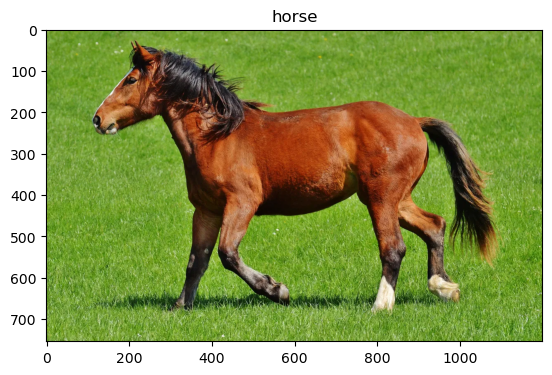

In [9]:
# display the prediction
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# class_names.append(add_class_names) in case you added your own dataset to the CIFAR-10 dataset
from matplotlib import pyplot as plt
plt.title(class_names[predicted_class])
plt.imshow(original_image)